In [1]:
#importing libraries we need for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [4]:
# loading the dataset

df = pd.read_csv("diabetes_clean.csv")
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                 

In [5]:
# assigning data types
categorical_columns = ['race', 'gender', 'age', 'diag_1', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','diag_2', 'diag_3', 'metformin', 'repaglinide', 
                       'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed',
                       'readmitted', 'max_glu_serum_transformed', 'A1Cresult_transformed']
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

encounter_id                    int64
patient_nbr                     int64
race                         category
gender                       category
age                          category
admission_type_id            category
discharge_disposition_id     category
admission_source_id          category
time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
diag_1                       category
diag_2                       category
diag_3                       category
number_diagnoses                int64
metformin                    category
repaglinide                  category
nateglinide                  category
chlorpropamide               category
glimepiride                  category
acetohexamide                category
glipizide                    category
glyburide   

In [6]:
# binarizing the target variable and dropping the original
df2= df[categorical_columns]
df2['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
df3 = df2.drop(axis=1, columns='readmitted')
df3.head()

C:\Users\munas\AppData\Local\Temp\ipykernel_18120\4147045648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)


,race,gender,age,diag_1,admission_type_id,discharge_disposition_id,admission_source_id,diag_2,diag_3,metformin,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,max_glu_serum_transformed,A1Cresult_transformed,readmitted_binary
0,Caucasian,Female,[10-20),276,1,1,7,250.01,255,No,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,1
1,AfricanAmerican,Female,[20-30),648,1,1,7,250,V27,No,...,No,No,No,No,No,No,Yes,Not measured,Not measured,0
2,Caucasian,Male,[30-40),8,1,1,7,250.43,403,No,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
3,Caucasian,Male,[40-50),197,1,1,7,157,250,No,...,No,No,No,No,No,Ch,Yes,Not measured,Not measured,0
4,Caucasian,Male,[50-60),414,2,1,2,411,250,No,...,No,No,No,No,No,No,Yes,Not measured,Not measured,1


In [7]:
# Defining the nominal columns
nominal_col = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
               'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']

# Frequency Encoding
for col in ['diag_1', 'diag_2', 'diag_3','admission_type_id', 'discharge_disposition_id', 'admission_source_id','race','gender' ,'change', 'diabetesMed']:
    freq_encoding = df3[col].value_counts(normalize=True)  # Calculate relative frequencies
    df3[f'{col}_encoded'] = df3[col].map(freq_encoding)
encoded_nominal = df3.drop(axis=1, columns=['race', 'gender', 'age', 'diag_1', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','diag_2', 'diag_3', 'metformin', 'repaglinide', 
                       'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone','acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                       'metformin-rosiglitazone','metformin-pioglitazone', 'change', 'diabetesMed',
                       'readmitted_binary', 'max_glu_serum_transformed', 'A1Cresult_transformed'])
encoded_nominal.head()




,diag_1_encoded,diag_2_encoded,diag_3_encoded,admission_type_id_encoded,discharge_disposition_id_encoded,admission_source_id_encoded,race_encoded,gender_encoded,change_encoded,diabetesMed_encoded
0,0.018674,0.014615,0.000704,0.532141,0.587539,0.570620,0.765698,0.538821,0.461781,0.768472
1,0.002601,0.055195,0.000347,0.532141,0.587539,0.570620,0.192559,0.538821,0.538219,0.768472
2,0.005099,0.000367,0.023681,0.532141,0.587539,0.570620,0.765698,0.461169,0.461781,0.768472
3,0.003202,0.000846,0.114306,0.532141,0.587539,0.570620,0.765698,0.461169,0.461781,0.768472
4,0.065006,0.025456,0.114306,0.178913,0.587539,0.010515,0.765698,0.461169,0.538219,0.768472


In [8]:


# Extracting the columns to be ordinally encoded
df_ordinal = df3[['age', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                  'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                  'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                  'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                  'metformin-rosiglitazone', 'metformin-pioglitazone', 
                  'max_glu_serum_transformed', 'A1Cresult_transformed']]

# Defining the columns to be ordinally encoded
ordinal_cols = list(df_ordinal.columns)

# Defining the categories for each column explicitly
cats = [
    ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],  # for 'age'
    ['No', 'Down', 'Steady', 'Up'],  # for 'metformin'
    ['No', 'Down', 'Steady', 'Up'],  # for 'repaglinide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'nateglinide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'chlorpropamide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glimepiride'
    ['No', 'Down', 'Steady', 'Up'],  # for 'acetohexamide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glipizide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glyburide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'tolbutamide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'pioglitazone'
    ['No', 'Down', 'Steady', 'Up'],  # for 'rosiglitazone'
    ['No', 'Down', 'Steady', 'Up'],  # for 'acarbose'
    ['No', 'Down', 'Steady', 'Up'],  # for 'miglitol'
    ['No', 'Down', 'Steady', 'Up'],  # for 'troglitazone'
    ['No', 'Down', 'Steady', 'Up'],  # for 'tolazamide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'examide'
    ['No', 'Down', 'Steady', 'Up'],  # for 'citoglipton'
    ['No', 'Down', 'Steady', 'Up'],  # for 'insulin'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glyburide-metformin'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glipizide-metformin'
    ['No', 'Down', 'Steady', 'Up'],  # for 'glimepiride-pioglitazone'
    ['No', 'Down', 'Steady', 'Up'],  # for 'metformin-rosiglitazone'
    ['No', 'Down', 'Steady', 'Up'],  # for 'metformin-pioglitazone'
    ['Not measured', 'Normal', 'Elevated', 'High'],  # for 'max_glu_serum_transformed'
    ['Not measured', 'Normal', 'High']  # for 'A1Cresult_transformed'
]

# Initializing ColumnTransformer with OrdinalEncoder
preprocessor = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=cats, dtype=int), ordinal_cols)
])

# Fitting the preprocessor and transforming the data
df_ordinal_encoded = preprocessor.fit_transform(df_ordinal)

# Converting the transformed data to a DataFrame with the original column names
df_ordinal_encoded = pd.DataFrame(df_ordinal_encoded, columns=ordinal_cols)

# Concatenating the frequency encoded dataframe with the ordinally encoded dataframe
df_encoded_complete = pd.concat([encoded_nominal, df_ordinal_encoded], axis=1)

# Displaying the first few rows
df_encoded_complete



,diag_1_encoded,diag_2_encoded,diag_3_encoded,admission_type_id_encoded,discharge_disposition_id_encoded,admission_source_id_encoded,race_encoded,gender_encoded,change_encoded,diabetesMed_encoded,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,max_glu_serum_transformed,A1Cresult_transformed
0,0.018674,0.014615,0.000704,0.532141,0.587539,0.570620,0.765698,0.538821,0.461781,0.768472,...,0,0,3,0,0,0,0,0,0,0
1,0.002601,0.055195,0.000347,0.532141,0.587539,0.570620,0.192559,0.538821,0.538219,0.768472,...,0,0,0,0,0,0,0,0,0,0
2,0.005099,0.000367,0.023681,0.532141,0.587539,0.570620,0.765698,0.461169,0.461781,0.768472,...,0,0,3,0,0,0,0,0,0,0
3,0.003202,0.000846,0.114306,0.532141,0.587539,0.570620,0.765698,0.461169,0.461781,0.768472,...,0,0,2,0,0,0,0,0,0,0
4,0.065006,0.025456,0.114306,0.178913,0.587539,0.010515,0.765698,0.461169,0.538219,0.768472,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,0.006976,0.000724,0.002866,0.532141,0.138333,0.570620,0.192559,0.461169,0.461781,0.768472,...,0,0,1,0,0,0,0,0,0,2
98049,0.008669,0.066423,0.003590,0.532141,0.007710,0.008628,0.192559,0.538821,0.538219,0.768472,...,0,0,2,0,0,0,0,0,0,0
98050,0.016746,0.001336,0.002101,0.532141,0.587539,0.570620,0.765698,0.461169,0.461781,0.768472,...,0,0,1,0,0,0,0,0,0,0
98051,0.019642,0.015104,0.003182,0.178913,0.138333,0.570620,0.765698,0.538821,0.461781,0.768472,...,0,0,3,0,0,0,0,0,0,0


Feature 0: 0.017354
Feature 1: 0.009729
Feature 2: 0.008315
Feature 3: 0.006026
Feature 4: 0.021675
Feature 5: 0.006836
Feature 6: 0.006434
Feature 7: 0.006132
Feature 8: 0.002039
Feature 9: 0.008432
Feature 10: 0.000927
Feature 11: 0.001404
Feature 12: 0.000000
Feature 13: 0.000087
Feature 14: 0.002821
Feature 15: 0.000000
Feature 16: 0.002840
Feature 17: 0.000000
Feature 18: 0.001576
Feature 19: 0.004809
Feature 20: 0.002469
Feature 21: 0.001301
Feature 22: 0.000089
Feature 23: 0.000127
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.000000
Feature 27: 0.000000
Feature 28: 0.002101
Feature 29: 0.000000
Feature 30: 0.002277
Feature 31: 0.003236
Feature 32: 0.000349
Feature 33: 0.002741
Feature 34: 0.000000
Feature 35: 0.001730


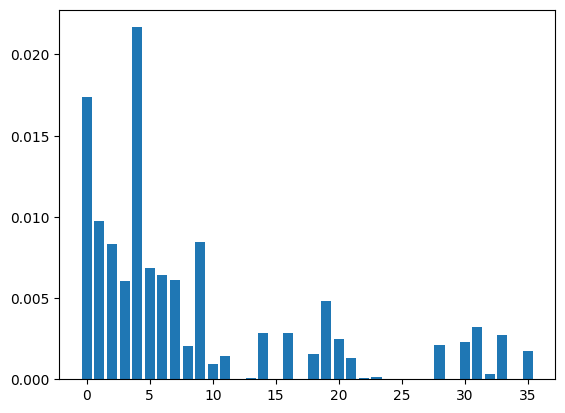

In [10]:
# retrieving numpy array

X = df_encoded_complete.values
y = df3['readmitted_binary'].values

# preparing target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# preparing output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Top 15 features with the highest scores:
Feature: discharge_disposition_id_encoded, Score: 0.021675
Feature: diag_1_encoded, Score: 0.017354
Feature: diag_2_encoded, Score: 0.009729
Feature: diabetesMed_encoded, Score: 0.008432
Feature: diag_3_encoded, Score: 0.008315
Feature: admission_source_id_encoded, Score: 0.006836
Feature: race_encoded, Score: 0.006434
Feature: gender_encoded, Score: 0.006132
Feature: admission_type_id_encoded, Score: 0.006026
Feature: tolbutamide, Score: 0.004809
Feature: glimepiride-pioglitazone, Score: 0.003236
Feature: acetohexamide, Score: 0.002840
Feature: chlorpropamide, Score: 0.002821
Feature: metformin-pioglitazone, Score: 0.002741
Feature: pioglitazone, Score: 0.002469


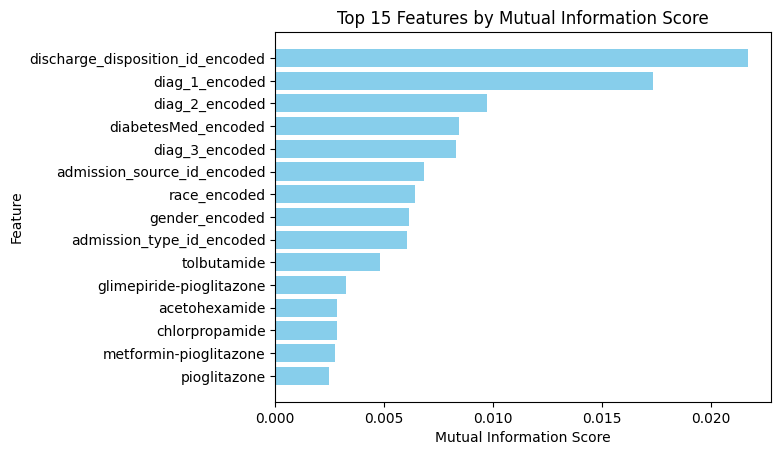

In [11]:
# Getting the feature names (if df_encoded_complete is a DataFrame, it has column names)
feature_names = df_encoded_complete.columns

# Combining feature scores with their names
feature_scores = list(zip(feature_names, fs.scores_))

# Sorting the features by score in descending order
feature_scores_sorted = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Getting the top 15 features
top_15_features = feature_scores_sorted[:15]

# Displaying the top 15 features with their scores
print("Top 15 features with the highest scores:")
for feature, score in top_15_features:
    print(f"Feature: {feature}, Score: {score:.6f}")

# Plotting the top 15 features
top_features_names = [feature for feature, score in top_15_features]
top_features_scores = [score for feature, score in top_15_features]

plt.barh(top_features_names, top_features_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 15 Features by Mutual Information Score')
plt.gca().invert_yaxis()  # To have the highest score at the top
plt.show()

In [ ]:
# numerical feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load Data
data = pd.read_csv('diabetes_clean.csv')
data['readmitted_binary'] = data['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)

# # Define features and target
X = data[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']]
y = data['readmitted_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Train your model (assuming RandomForestClassifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

# Display feature importance
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")
joblib.dump(rf, 'readmission_model.pkl')